# Lab 5 part 1: Classification

In this lab, you will contrast regression and classification.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data
from plt_one_addpt_onclick import plt_one_addpt_onclick
plt.style.use('./deeplearning.mplstyle')

## Classification Problems

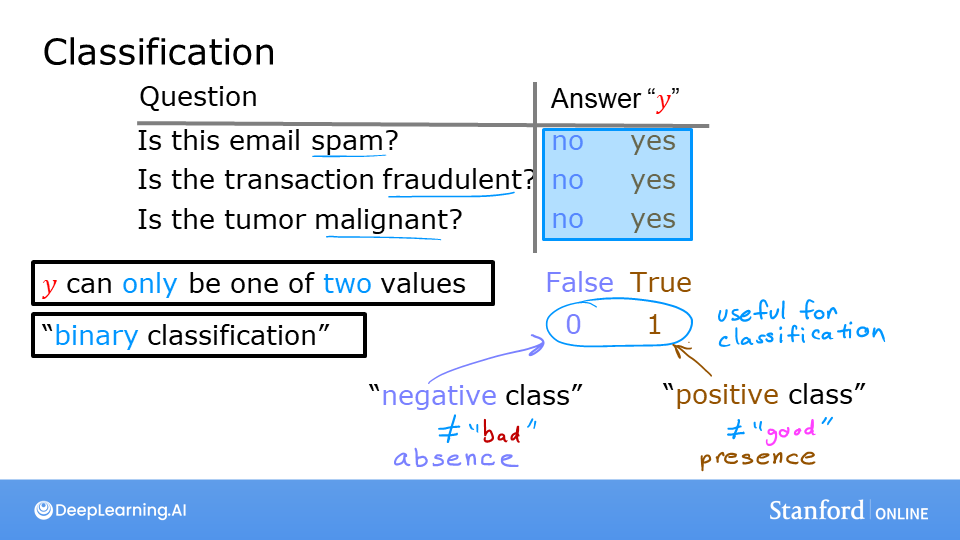


Examples of classification problems are things like: identifying email as Spam or Not Spam or determining if a tumor is malignant or benign. In particular, these are examples of *binary* classification where there are two possible outcomes.  Outcomes can be  described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'. 

Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below, 'X' is used to represent the positive values while 'O' represents negative outcomes. 

In [10]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

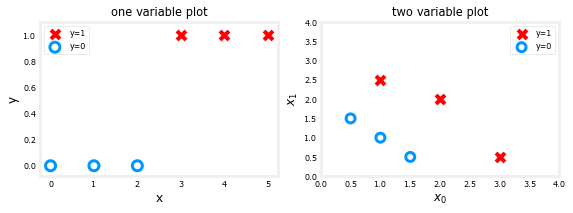

In [11]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()


Note in the plots above:
- In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
   - Recall in the case of linear regression, y would not have been limited to two values but could have been any value.
- In the two-variable plot, the y axis is not available.  Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
    - Recall in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.

## Linear Regression approach
In the previous week, you applied linear regression to build a prediction model. Let's try that approach here using the simple example that was described in the lecture. The model will predict if a tumor is benign or malignant based on tumor size.  Try the following:
- Apply ' Linear Regression' to find the best linear regression model for the given data.
    - Note the resulting linear model does **not** match the data well. 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reshape X_train and y_train for sklearn
X_train = x_train.reshape(-1, 1)
Y_train = y_train

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get the coefficients
coef = model.coef_[0]
intercept = model.intercept_

# Make predictions
Y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.20499999999999996


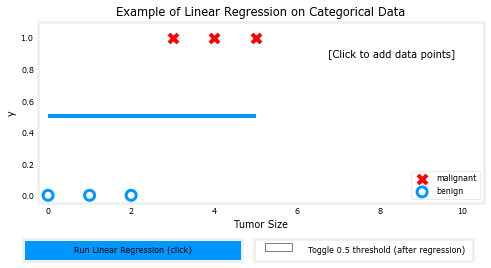

In [25]:
w_in = np.zeros((1))
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False)

The example above demonstrates that the linear model is insufficient to model categorical data. The model can be extended as described in the following lab.

## Congratulations!
In this lab you:
- explored categorical data sets and plotting
- determined that linear regression was insufficient for a classification problem.